### Project Overview ###

Objective:
The goal of this project is to analyze sales data to identify optimal discount strategies.
Additionally, it includes insights such as: 1) Top 5 sales by category and 2) Sales by Category by region.

Data Source:
This data is sourced from Kaggle: https://www.kaggle.com/datasets/timchant/supstore-dataset-2019-2022?resource=download

---

Welcome to the Optimal Discount Strategy Analysis Tool
First few rows of the dataset:
         order_id  order_date  ship_date       customer   manufactory  \
0  US-2020-103800       43468      43472  Darren Powers  Message Book   
1  US-2020-112326       43469      43473  Phillina Ober           GBC   
2  US-2020-112326       43469      43473  Phillina Ober         Avery   
3  US-2020-112326       43469      43473            NaN         SAFCO   
4  US-2020-141817       43470      43477     Mick Brown         Avery   

                                        product_name      segment  \
0  Message Book, Wirebound, Fou

C:\Users\kikas\AppData\Local\Temp\ipykernel_23580\3560250007.py:71: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  summary_stats['median'] = data.median()


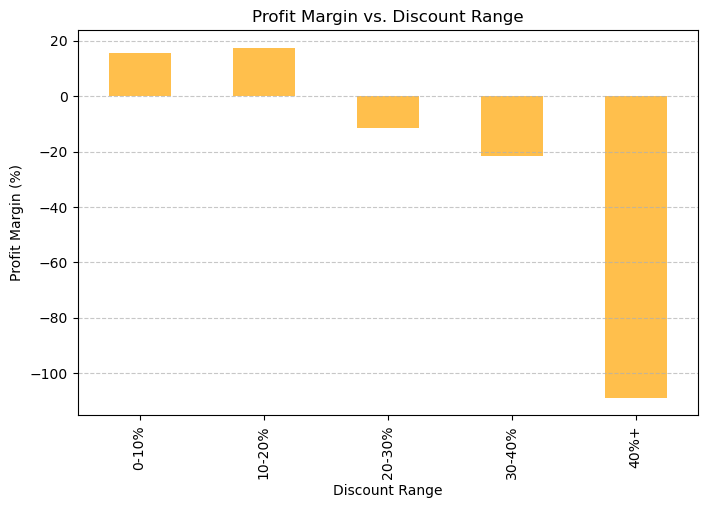

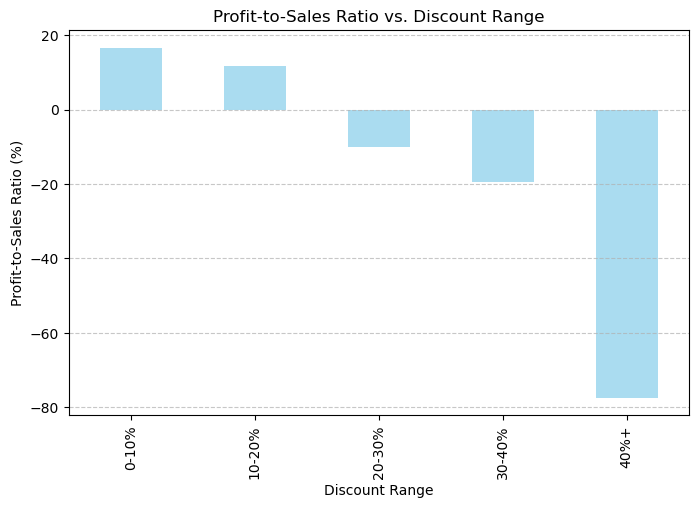

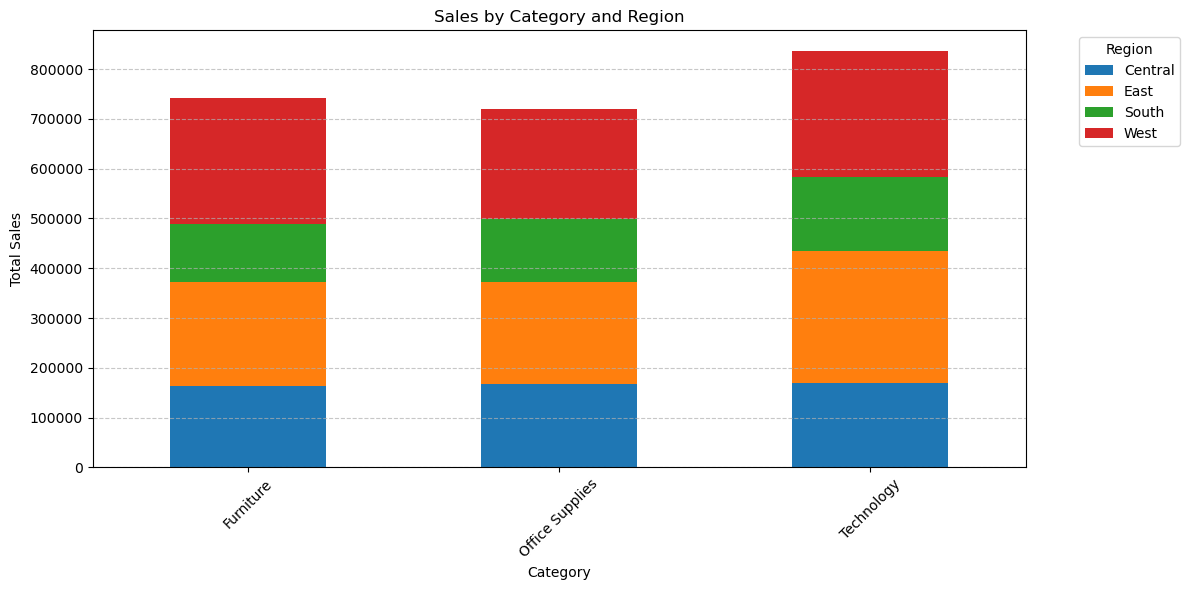


### Analysis and Insights ###

Findings:
The optimal discount range is 10-20%, which provides the highest average profit margin of 17.48%.
This range also generated a total sales volume of 792152.89.

Supporting Data:
Profit margin and profit-to-sales ratio trends show that discounts greater than 30% tend to lower profitability.

### Conclusion and Recommendations ###

Summary:
The analysis identified the optimal discount range as the range that maximizes profit margin and maintains reasonable sales.
Excessive discounts (>30%) negatively impact profitability.

Recommendations:
1. Focus on discounts between 10-20% to maximize profitability.
2. Avoid discounts greater than 30% unless targeting specific high-sales events.
3. Use tiered discounts strategically across product categories to balance profitability and sales volume.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Hardcoded file path
FILE_PATH = r"C:\Users\kikas\OneDrive\projects\Data Project Rubric\Input file\superstore_dataset.csv"

def project_overview():
    """
    Displays the project overview, objectives, and data source.
    """
    print("### Project Overview ###")
    print("\nObjective:")
    print("The goal of this project is to analyze sales data to identify optimal discount strategies.")
    print("Additionally, it includes insights such as: 1) Top 5 sales by category and 2) Sales by Category by region.")
    print("\nData Source:")
    print("This data is sourced from Kaggle: https://www.kaggle.com/datasets/timchant/supstore-dataset-2019-2022?resource=download")
    print("\n---\n")

# Function to load and clean data
def load_and_prepare_data(file_path):
    data = pd.read_csv(file_path)
    
    # Initial Check
    print("First few rows of the dataset:")
    print(data.head())
    print("\nDataset Info:")
    print(data.info())
    print("\nMissing Values Count:")
    print(data.isnull().sum())

    # Selection Options
    # Focus on relevant columns
    data = data[['order_date', 'ship_date', 'manufactory', 'product_name', 'segment', 
                 'category', 'subcategory', 'region', 'state', 'discount', 'profit', 
                 'quantity', 'sales', 'profit_margin']]

    # Data Cleaning and Preparation
    # Handle Missing Values
    data = data.fillna(method='ffill')
    print("\nMissing values handled with forward fill. Remaining missing values per column:")
    print(data.isnull().sum())

    # Data Type Adjustments:
    # Convert 'Date' columns to a readable date format
    data['order_date'] = (pd.to_datetime('1899-12-30') + pd.to_timedelta(data['order_date'], unit='D')).dt.strftime('%m/%d/%Y')
    data['ship_date'] = (pd.to_datetime('1899-12-30') + pd.to_timedelta(data['ship_date'], unit='D')).dt.strftime('%m/%d/%Y')
    print("\nFirst few rows of 'order_date' and 'ship_date' after conversion:")
    print(data[['order_date', 'ship_date']].head())

    # Feature Engineering
    # Create a new column called Cost: Sales - Profit
    data['cost'] = data['sales'] - data['profit']

    # Create a new column called Markup: Profit/Cost
    data['Markup'] = (data['profit'] / data['cost']) * 100

    # Convert profit_margin to percentage
    data['profit_margin'] = data['profit_margin'] * 100

    # Print updated data
    print("\nUpdated Dataset with Feature Engineering:")
    print(data)

    return data

# Function for exploratory data analysis (EDA)
def perform_eda(data):
    # Descriptive Statistics
    summary_stats = data.describe().T  # Transpose for better readability
    # Add median to the summary
    summary_stats['median'] = data.median()
    print("\nSummary Statistics for Numerical Columns:")
    print(summary_stats[['mean', '50%', 'median', 'min', 'max']])
    
    # Get top 5 sales per category
    top_sales = data.sort_values(by=['category', 'sales'], ascending=[True, False]).groupby('category').head(5)
    print("\nTop 5 Sales per Category:")
    print(top_sales)

# Function to perform discount analysis
def perform_discount_analysis(data):
    # Ensure discount values are within valid ranges
    data = data[(data['discount'] >= 0) & (data['discount'] <= 1)]

    # Categorize discounts into ranges
    bins = [0, 0.1, 0.2, 0.3, 0.4, 1.0]
    labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40%+']
    data['discount_range'] = pd.cut(data['discount'], bins=bins, labels=labels)
    
    # Perform aggregation
    discount_analysis = data.groupby('discount_range').agg({
        'sales': 'sum',
        'profit': 'sum',
        'profit_margin': 'mean'
    })
    
    # Add a profit-to-sales ratio column
    discount_analysis['profit_to_sales_ratio'] = (discount_analysis['profit'] / discount_analysis['sales']) * 100

    return discount_analysis

# Function for visualizing results
def visualize_results(discount_analysis, data):
    """
    Generates visualizations for discount analysis and category-region sales.
    """
    # Plot Profit Margin vs. Discount Range
    discount_analysis['profit_margin'].plot(kind='bar', color='orange', alpha=0.7, figsize=(8, 5))
    plt.title("Profit Margin vs. Discount Range")
    plt.xlabel("Discount Range")
    plt.ylabel("Profit Margin (%)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Plot Profit-to-Sales Ratio vs. Discount Range
    discount_analysis['profit_to_sales_ratio'].plot(kind='bar', color='skyblue', alpha=0.7, figsize=(8, 5))
    plt.title("Profit-to-Sales Ratio vs. Discount Range")
    plt.xlabel("Discount Range")
    plt.ylabel("Profit-to-Sales Ratio (%)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Sales by Category and Region
    category_region_sales = data.groupby(['category', 'region'])['sales'].sum().unstack()
    category_region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Sales by Category and Region')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Function for Analysis and Insights
def analysis_and_insights(data, discount_analysis):
    print("\n### Analysis and Insights ###")
    print("\nFindings:")
    optimal_range = discount_analysis['profit_margin'].idxmax()
    max_profit_margin = discount_analysis.loc[optimal_range, 'profit_margin']
    max_sales = discount_analysis.loc[optimal_range, 'sales']
    print(f"The optimal discount range is {optimal_range}, which provides the highest average profit margin of {max_profit_margin:.2f}%.")
    print(f"This range also generated a total sales volume of {max_sales:.2f}.")

    print("\nSupporting Data:")
    print("Profit margin and profit-to-sales ratio trends show that discounts greater than 30% tend to lower profitability.")

# Function for Conclusion and Recommendations
def conclusion_and_recommendations():
    print("\n### Conclusion and Recommendations ###")
    print("\nSummary:")
    print("The analysis identified the optimal discount range as the range that maximizes profit margin and maintains reasonable sales.")
    print("Excessive discounts (>30%) negatively impact profitability.")
    
    print("\nRecommendations:")
    print("1. Focus on discounts between 10-20% to maximize profitability.")
    print("2. Avoid discounts greater than 30% unless targeting specific high-sales events.")
    print("3. Use tiered discounts strategically across product categories to balance profitability and sales volume.")

# Main function
def main():
    # Display Project Overview
    project_overview()
    
    print("Welcome to the Optimal Discount Strategy Analysis Tool")
    
    # Load and prepare data
    try:
        data = load_and_prepare_data(FILE_PATH)
    except Exception as e:
        print(f"Error loading data: {e}")
        return
    
    # Perform EDA
    perform_eda(data)
    
    # Perform discount analysis
    discount_analysis = perform_discount_analysis(data)
    print("\nDiscount Analysis Results:")
    print(discount_analysis)
    
    # Visualize results
    visualize_results(discount_analysis, data)
    
    # Analysis and Insights
    analysis_and_insights(data, discount_analysis)
    
    # Conclusion and Recommendations
    conclusion_and_recommendations()

if __name__ == "__main__":
    main()
